# Linear Regression

This notebook implements a linear regression model. It uses Tensorflow to build and train the model.

In [1]:
# Necessary imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# configure style of the plot (optional)
plt.style.use('ggplot')

# Generate Synthetic Data

In [35]:
# Number of observations noted.
n_observations = 500

# Slope value
M = 2.0

# Intercept value
C = 10.0

In [36]:
# Create the randomness at each observation point.
# This is done to make the data more realistic since we always find some noise in real data.
# We create noise of amplitude [0, 2).
randomness = 10.0 * np.random.normal(size=n_observations)

In [48]:
# Create synthetic datapoints
X = np.linspace(-10.0, 10.0, n_observations) # X coordinates
Y = M * X + C + randomness # Y coordinates + random noise

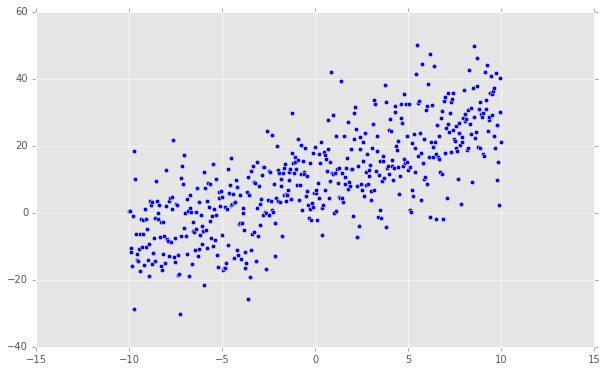

In [49]:
# Take a look at the data.
plt.figure(figsize=(10, 6)) # Set figure size.
plt.scatter(X, Y)
plt.show()

Split the dataset into training and testing data.

In [50]:
# Function to split data into train and test sets.
from sklearn.model_selection import train_test_split

In [51]:
# Training set - 80%
# Testing set - 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

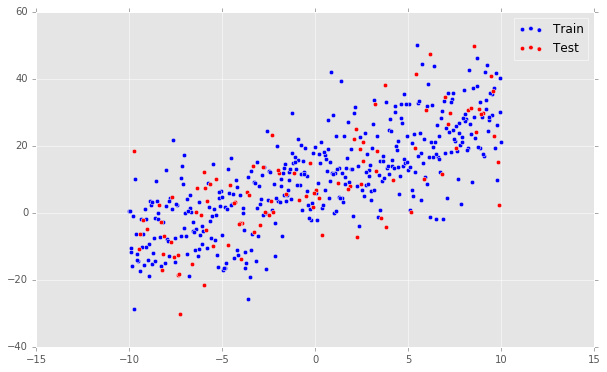

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, c='b', label='Train')
plt.scatter(X_test, Y_test, c='r', label='Test')
plt.legend()
plt.show()

In [95]:
class Data:
    '''
    Helper class for easy retreiving a training batch.
    '''
    def __init__(self, X, Y, batch_size=16):
        self.X = X
        self.Y = Y
        
        # reshape arrays.
        self.X = np.reshape(self.X, (-1, 1))
        self.Y = np.reshape(self.Y, (-1, 1))
        
        self.batch_size = batch_size
    
    def next_batch(self):
        '''
        Get the next batch of size `self.batch_size`.
        '''
        
        batch_size = self.batch_size
        
        # Get number of observations.
        n = self.X.shape[0]
        
        # Calculate number of batches.
        n_batches = int(np.ceil(n/batch_size))
        
        for b in range(n_batches):
            # Get start index of batch.
            start = b * batch_size
            
            # Get end index of batch.
            end = start + batch_size
            # Set limit to the ending index.
            end = min(end, n)
            
            # yielding will return a generator.
            yield (self.X[start: end], self.Y[start: end])

In [96]:
data = Data(X_train, Y_train)

# Build the Model

In [97]:
def linear_model():
    '''
    Returns the output of Linear model.
    Args:
        x = x coordinates placeholder (input).
    '''
    
    # Reset current graph
    tf.reset_default_graph()
    
    # Define IO placeholders
    x = tf.placeholder(tf.float32, shape=(None, 1), name='x') # X coordinates placeholder (input)
    y = tf.placeholder(tf.float32, shape=(None, 1), name='y') # Y coordinates placeholder (output)
    
    # Create model parameters.
    with tf.variable_scope('Linear-Model'):
        # Create slope variable
        m = tf.get_variable('slope', shape=(), initializer=tf.constant_initializer(1.0))
        
        # Create intercept variable
        c = tf.get_variable('intercept', shape=(), initializer=tf.constant_initializer(0.1))
    
    # Define linear output.
    Y_pred = m * x + c
    
    return x, y, Y_pred

In [98]:
# Get input placeholder, output placeholder and predicted output of linear model.
x, y, Y_pred = linear_model()

In [99]:
# Define loss function (Mean Squared error)
loss = tf.reduce_mean(tf.square(y - Y_pred))

In [100]:
# Define optimizer operation
optimizer = tf.train.AdamOptimizer().minimize(loss)

# Train the Model

In [120]:
# Training params
n_epochs = 1000

In [121]:
# Create saver object to save and restore model state.
saver = tf.train.Saver()

# Create tensorflow session to run operations.
with tf.Session() as session:
    
    # Initialize variables.
    session.run(tf.global_variables_initializer())
    
    # Run training epochs.
    for e in range(n_epochs):
        losses = []
        
        # Iterate over all batches.
        for batch_x, batch_y in data.next_batch():
            # Run optimizer and loss operations given input batches.
            loss_, _ = session.run([loss, optimizer], feed_dict={x: batch_x, y: batch_y})
            losses.append(loss_)
        
        if e%100 == 0:
            avg_loss = sum(losses) / len(losses)
            print("Average loss at epoch {} = {}.".format(e, avg_loss))
    
    # Save the state of the model.
    saver.save(session, './linear_model.ckpt')

Average loss at epoch 0 = 224.69514953613282.
Average loss at epoch 100 = 153.83599670410158.
Average loss at epoch 200 = 125.97579315185547.
Average loss at epoch 300 = 108.44973175048828.
Average loss at epoch 400 = 99.50499557495117.
Average loss at epoch 500 = 96.40841995239258.
Average loss at epoch 600 = 95.78289566040038.
Average loss at epoch 700 = 95.69975250244141.
Average loss at epoch 800 = 95.69024429321288.
Average loss at epoch 900 = 95.68917755126954.


In [134]:
# To Evaluate the model, run the model on testing X.
with tf.Session() as sess:
    # Restore the saved model.
    saver.restore(sess, './linear_model.ckpt')
    
    # Run the Y_pred node.
    y_test_pred = sess.run(Y_pred, feed_dict={x: np.expand_dims(X_test, -1)})

INFO:tensorflow:Restoring parameters from ./linear_model.ckpt


INFO:tensorflow:Restoring parameters from ./linear_model.ckpt


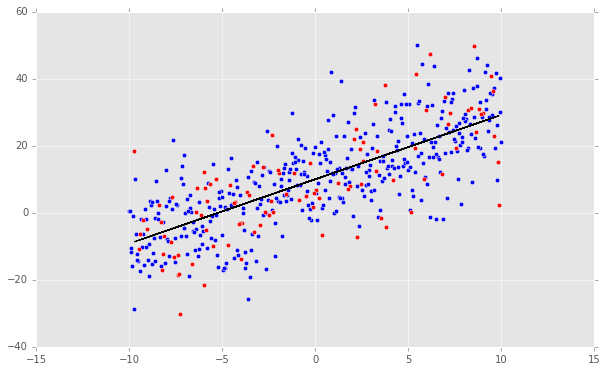

In [135]:
# Visualize the predicted values.
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, c='b') # training set
plt.scatter(X_test, Y_test, c='r') # testing set
plt.plot(X_test, y_test_pred, c='k') # prediction of testing set
plt.show()